In [86]:
%matplotlib inline 

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os 

#import CSV
graduate_csv = "graduate_earnings_all.csv"

graduate_df = pd.read_csv(graduate_csv)

In [43]:
reduced_graduate_df = graduate_df.loc[(reduced_graduate_df["p25_earnings"] > 0)]
reduced_graduate_df.head(5)

,institution_id,institution_name,deglevl_code,deglevl,degcip_4dig,ciptitle,grad_cohort,grad_cohort_label,year_postgrad,p25_earnings,p50_earnings,p75_earnings,cellcount,cell_suppressed,state,system,first_release,last_update,cpi_reportyear
1,1345,ADAMS STATE COLLEGE,3,Associates,2401,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",1996,1996-2000,5,23108.0,34633.0,50141.0,73.0,0,CO,cdhe,8242018,8242018,2016
2,1345,ADAMS STATE COLLEGE,3,Associates,2401,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",1996,1996-2000,10,31990.0,41565.0,68312.0,65.0,0,CO,cdhe,8242018,8242018,2016
3,1345,ADAMS STATE COLLEGE,3,Associates,2401,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",2001,2001-2005,1,17794.0,25774.0,32213.0,46.0,0,CO,cdhe,8242018,8242018,2016
4,1345,ADAMS STATE COLLEGE,3,Associates,2401,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",2001,2001-2005,5,27763.0,36398.0,51928.0,79.0,0,CO,cdhe,8242018,8242018,2016
5,1345,ADAMS STATE COLLEGE,3,Associates,2401,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",2001,2001-2005,10,31012.0,43798.0,64121.0,85.0,0,CO,cdhe,8242018,8242018,2016


In [44]:
#Create new DF with columns needed for analysis
reduced_graduate_df = graduate_df.loc[:, ["institution_name", "deglevl", "ciptitle","grad_cohort", "grad_cohort_label", "year_postgrad", "p25_earnings", "p50_earnings", "p75_earnings", "state"]]
reduced_graduate_df.head()

,institution_name,deglevl,ciptitle,grad_cohort,grad_cohort_label,year_postgrad,p25_earnings,p50_earnings,p75_earnings,state
0,ADAMS STATE COLLEGE,Associates,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",1996,1996-2000,1,NaN,NaN,NaN,CO
1,ADAMS STATE COLLEGE,Associates,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",1996,1996-2000,5,23108.0,34633.0,50141.0,CO
2,ADAMS STATE COLLEGE,Associates,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",1996,1996-2000,10,31990.0,41565.0,68312.0,CO
3,ADAMS STATE COLLEGE,Associates,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",2001,2001-2005,1,17794.0,25774.0,32213.0,CO
4,ADAMS STATE COLLEGE,Associates,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",2001,2001-2005,5,27763.0,36398.0,51928.0,CO


In [45]:
#Check for null values
reduced_graduate_df.isnull().any()

institution_name     False
deglevl              False
ciptitle             False
grad_cohort          False
grad_cohort_label    False
year_postgrad        False
p25_earnings          True
p50_earnings          True
p75_earnings          True
state                False
dtype: bool

In [46]:
#Rename columns
clean_df = reduced_graduate_df.rename(index=str, columns={"institution_name": "College/University", "deglevl": "Degree", "ciptitle": "Program", "grad_cohort": "Cohort", "year_postgrad": "Years Post Grad", "p25_earnings": "25th Percentile Earnings", "p50_earnings": "50th Percentile Earnings", "p75_earnings": "75th Percentile Earnings", "state": "State"})

In [47]:
#Add Average Earnings column to simplify earnings analysis
clean_df['Average Earnings'] = clean_df[["25th Percentile Earnings", "50th Percentile Earnings", "75th Percentile Earnings"]].apply(np.mean, axis=1)
clean_df.loc[:,"Average Earnings"] = clean_df["Average Earnings"].astype(float).map("${:,.2f}".format)
clean_df.head()


#Final clean DF
new_clean_df = clean_df.loc[:, ["State", "College/University", "Program", "Degree", "Cohort", "Years Post Grad", "Average Earnings"]]
new_clean_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
0,CO,ADAMS STATE COLLEGE,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Associates,1996,1,$nan
1,CO,ADAMS STATE COLLEGE,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Associates,1996,5,"$35,960.67"
2,CO,ADAMS STATE COLLEGE,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Associates,1996,10,"$47,289.00"
3,CO,ADAMS STATE COLLEGE,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Associates,2001,1,"$25,260.33"
4,CO,ADAMS STATE COLLEGE,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Associates,2001,5,"$38,696.33"
5,CO,ADAMS STATE COLLEGE,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Associates,2001,10,"$46,310.33"


In [48]:
#We are only analyzing the data for Bachelor, Masters, and Doctorates degrees
#Filtered by Bachelors
bachelor_df = new_clean_df.loc[(new_clean_df["Degree"]=="Baccalaureate")]
bachelor_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
9,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2004,10,"$329,249.00"
14,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2001,10,"$281,868.67"
15,CO,COLORADO SCHOOL OF MINES,PETROLEUM ENGINEERING,Baccalaureate,2004,10,"$267,413.33"
17,CO,COLORADO SCHOOL OF MINES,PETROLEUM ENGINEERING,Baccalaureate,2001,10,"$261,703.33"
18,CO,COLORADO SCHOOL OF MINES,PETROLEUM ENGINEERING,Baccalaureate,1998,10,"$224,510.00"
19,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2007,5,"$186,229.00"


In [49]:
#Highest Average Earnings Bachelor Degrees in TX
tx_bachelor_df = bachelor_df.loc[(new_clean_df["State"]=="TX")]
tx_bachelor_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
9,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2004,10,"$329,249.00"
14,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2001,10,"$281,868.67"
19,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2007,5,"$186,229.00"
20,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2004,5,"$187,258.67"
28,TX,UNIVERSITY OF TEXAS-AUSTIN,"BUSINESS/COMMERCE, GENERAL",Baccalaureate,2001,10,"$175,514.00"
30,TX,UNIVERSITY OF TEXAS-AUSTIN,"BUSINESS/COMMERCE, GENERAL",Baccalaureate,2004,10,"$193,089.67"


In [50]:
#Highest Average Earnings Bachelor Degrees in CO
co_bachelor_df = bachelor_df.loc[(new_clean_df["State"]=="CO")]
co_bachelor_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
15,CO,COLORADO SCHOOL OF MINES,PETROLEUM ENGINEERING,Baccalaureate,2004,10,"$267,413.33"
17,CO,COLORADO SCHOOL OF MINES,PETROLEUM ENGINEERING,Baccalaureate,2001,10,"$261,703.33"
18,CO,COLORADO SCHOOL OF MINES,PETROLEUM ENGINEERING,Baccalaureate,1998,10,"$224,510.00"
21,CO,COLORADO SCHOOL OF MINES,PETROLEUM ENGINEERING,Baccalaureate,2004,5,"$184,320.33"
31,CO,COLORADO SCHOOL OF MINES,PETROLEUM ENGINEERING,Baccalaureate,2007,5,"$165,989.33"
58,CO,COLORADO SCHOOL OF MINES,PETROLEUM ENGINEERING,Baccalaureate,2001,5,"$149,085.67"


In [51]:
#Filtered by Masters
masters_df = new_clean_df.loc[(new_clean_df["Degree"]=="Masters")]
masters_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
29,TX,UNIVERSITY OF TEXAS-AUSTIN,"BUSINESS, MANAGEMENT, MARKETING, AND RELATED S...",Masters,2001,10,"$170,403.67"
33,TX,UNIVERSITY OF TEXAS-AUSTIN,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,Masters,2001,10,"$166,107.67"
37,CO,COLORADO SCHOOL OF MINES,PHYSICAL SCIENCES,Masters,2001,10,"$171,280.67"
46,TX,UNIVERSITY OF TEXAS-AUSTIN,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,Masters,2006,5,"$154,050.67"
47,CO,COLORADO STATE UNIVERSITY,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,Masters,1996,10,"$151,229.33"
63,CO,COLORADO SCHOOL OF MINES,SOCIAL SCIENCES,Masters,2001,10,"$141,780.33"


In [52]:
#Highest Average Earnings Masters Degrees in TX
tx_masters_df = masters_df.loc[(new_clean_df["State"]=="TX")]
tx_masters_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
29,TX,UNIVERSITY OF TEXAS-AUSTIN,"BUSINESS, MANAGEMENT, MARKETING, AND RELATED S...",Masters,2001,10,"$170,403.67"
33,TX,UNIVERSITY OF TEXAS-AUSTIN,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,Masters,2001,10,"$166,107.67"
46,TX,UNIVERSITY OF TEXAS-AUSTIN,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,Masters,2006,5,"$154,050.67"
66,TX,UNIVERSITY OF TEXAS-AUSTIN,"BUSINESS, MANAGEMENT, MARKETING, AND RELATED S...",Masters,2006,5,"$141,895.00"
72,TX,UNIVERSITY OF TEXAS-AUSTIN,ENGINEERING,Masters,2001,10,"$138,439.67"
78,TX,UNIVERSITY OF TEXAS AT DALLAS,ENGINEERING,Masters,2001,10,"$132,653.00"


In [53]:
#Highest Average Earnings Masters Degrees in CO
co_masters_df = masters_df.loc[(new_clean_df["State"]=="CO")]
co_masters_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
37,CO,COLORADO SCHOOL OF MINES,PHYSICAL SCIENCES,Masters,2001,10,"$171,280.67"
47,CO,COLORADO STATE UNIVERSITY,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,Masters,1996,10,"$151,229.33"
63,CO,COLORADO SCHOOL OF MINES,SOCIAL SCIENCES,Masters,2001,10,"$141,780.33"
64,CO,UNIVERSITY OF COLORADO DENVER,HEALTH PROFESSIONS AND RELATED PROGRAMS,Masters,1996,10,"$149,856.00"
68,CO,COLORADO SCHOOL OF MINES,PHYSICAL SCIENCES,Masters,1996,10,"$138,754.00"
79,CO,UNIVERSITY OF COLORADO-BOULDER,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,Masters,2001,10,"$137,432.67"


In [54]:
#Filtered by Doctoral Degrees
doctoral_df = new_clean_df.loc[(new_clean_df["Degree"].str.contains("Doctoral"))]
doctoral_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
10,TX,UNIV OF TEXAS SOUTHWESTERN MED CTR,MEDICINE,Doctoral - Professional Practice,2001,10,"$295,536.67"
11,TX,UT HEALTH CENTER-SAN ANTONIO,MEDICINE,Doctoral - Professional Practice,2001,10,"$291,736.67"
12,TX,UNIV OF TEXAS HEALTH SCIENCE CENTER,MEDICINE,Doctoral - Professional Practice,2001,10,"$292,377.33"
13,TX,UNIV OF TEXAS MEDICAL BRANCH,MEDICINE,Doctoral - Professional Practice,2001,10,"$279,900.67"
16,CO,UNIVERSITY OF COLORADO DENVER,MEDICINE,Doctoral - Professional Practice,2001,10,"$268,792.00"
22,TX,UNIVERSITY OF TEXAS-AUSTIN,"BUSINESS, MANAGEMENT, MARKETING, AND RELATED S...",Doctoral - Research/Scholarship,2011,1,"$174,588.00"


In [55]:
#Highest Average Earnings Doctoral Degrees in TX
tx_doctoral_df = doctoral_df.loc[(new_clean_df["State"]=="TX")]
tx_doctoral_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
10,TX,UNIV OF TEXAS SOUTHWESTERN MED CTR,MEDICINE,Doctoral - Professional Practice,2001,10,"$295,536.67"
11,TX,UT HEALTH CENTER-SAN ANTONIO,MEDICINE,Doctoral - Professional Practice,2001,10,"$291,736.67"
12,TX,UNIV OF TEXAS HEALTH SCIENCE CENTER,MEDICINE,Doctoral - Professional Practice,2001,10,"$292,377.33"
13,TX,UNIV OF TEXAS MEDICAL BRANCH,MEDICINE,Doctoral - Professional Practice,2001,10,"$279,900.67"
22,TX,UNIVERSITY OF TEXAS-AUSTIN,"BUSINESS, MANAGEMENT, MARKETING, AND RELATED S...",Doctoral - Research/Scholarship,2011,1,"$174,588.00"
23,TX,UNIV OF TEXAS HEALTH SCIENCE CENTER,MEDICINE,Doctoral - Professional Practice,2006,5,"$172,807.67"


In [56]:
#Highest Average Earnings Doctoral Degrees in CO
co_doctoral_df = doctoral_df.loc[(new_clean_df["State"]=="CO")]
co_doctoral_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
16,CO,UNIVERSITY OF COLORADO DENVER,MEDICINE,Doctoral - Professional Practice,2001,10,"$268,792.00"
51,CO,UNIVERSITY OF COLORADO-BOULDER,"BUSINESS, MANAGEMENT, MARKETING, AND RELATED S...",Doctoral - Research/Scholarship,2001,10,"$153,036.33"
56,CO,UNIVERSITY OF COLORADO DENVER,MEDICINE,Doctoral - Professional Practice,2006,5,"$143,945.67"
61,CO,UNIVERSITY OF COLORADO-BOULDER,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,Doctoral - Research/Scholarship,2006,5,"$152,863.00"
62,CO,UNIVERSITY OF COLORADO-BOULDER,"BUSINESS, MANAGEMENT, MARKETING, AND RELATED S...",Doctoral - Research/Scholarship,2006,5,"$141,572.33"
65,CO,UNIVERSITY OF COLORADO DENVER,DENTISTRY,Doctoral - Professional Practice,2001,10,"$146,107.00"


In [57]:
#Highest Average Earnings Bachelor Degrees in TX
tx_bachelor_df = bachelor_df.loc[(new_clean_df["State"]=="TX")]
tx_bachelor_df.head(6)

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
9,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2004,10,"$329,249.00"
14,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2001,10,"$281,868.67"
19,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2007,5,"$186,229.00"
20,TX,UNIVERSITY OF TEXAS-AUSTIN,PETROLEUM ENGINEERING,Baccalaureate,2004,5,"$187,258.67"
28,TX,UNIVERSITY OF TEXAS-AUSTIN,"BUSINESS/COMMERCE, GENERAL",Baccalaureate,2001,10,"$175,514.00"
30,TX,UNIVERSITY OF TEXAS-AUSTIN,"BUSINESS/COMMERCE, GENERAL",Baccalaureate,2004,10,"$193,089.67"


In [58]:
tx_bachelor2_df = tx_bachelor_df.sort_values("Average Earnings", ascending=False)
tx_bachelor2_df

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
19957,TX,UNIVERSITY OF TEXAS-AUSTIN,ZOOLOGY/ANIMAL BIOLOGY,Baccalaureate,2007,5,$nan
16613,TX,UNIVERSITY OF TEXAS-SAN ANTONIO,"LINGUISTIC, COMPARATIVE, AND RELATED LANGUAGE ...",Baccalaureate,2013,1,$nan
16542,TX,UNIVERSITY OF TEXAS-SAN ANTONIO,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Baccalaureate,2004,10,$nan
16541,TX,UNIVERSITY OF TEXAS-SAN ANTONIO,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Baccalaureate,2004,5,$nan
16540,TX,UNIVERSITY OF TEXAS-SAN ANTONIO,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Baccalaureate,2004,1,$nan
16539,TX,UNIVERSITY OF TEXAS-SAN ANTONIO,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Baccalaureate,2001,10,$nan
16538,TX,UNIVERSITY OF TEXAS-SAN ANTONIO,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Baccalaureate,2001,5,$nan
16537,TX,UNIVERSITY OF TEXAS-SAN ANTONIO,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Baccalaureate,2001,1,$nan
16536,TX,UNIVERSITY OF TEXAS-PERMIAN BASIN,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Baccalaureate,2013,1,$nan
16535,TX,UNIVERSITY OF TEXAS-PERMIAN BASIN,"LIBERAL ARTS AND SCIENCES, GENERAL STUDIES AND...",Baccalaureate,2010,1,$nan


In [59]:
tx_bachelor_df = tx_bachelor_df.sort_values(["Program", "Average Earnings"], ascending=True)
tx_bachelor_df.head()

,State,College/University,Program,Degree,Cohort,Years Post Grad,Average Earnings
93,TX,UNIVERSITY OF TEXAS-AUSTIN,ACCOUNTING AND RELATED SERVICES,Baccalaureate,2004,10,"$129,976.67"
77,TX,UNIVERSITY OF TEXAS-AUSTIN,ACCOUNTING AND RELATED SERVICES,Baccalaureate,2001,10,"$136,081.00"
8486,TX,UNIVERSITY OF TEXAS - BROWNSVILLE,ACCOUNTING AND RELATED SERVICES,Baccalaureate,2010,1,"$34,471.67"
8502,TX,UNIVERSITY OF TEXAS - BROWNSVILLE,ACCOUNTING AND RELATED SERVICES,Baccalaureate,2004,1,"$36,044.67"
8250,TX,UNIVERSITY OF TEXAS - PAN AMERICAN,ACCOUNTING AND RELATED SERVICES,Baccalaureate,2010,1,"$37,051.33"


In [60]:
#average earnings for percentile for cohorts (all subjects)

import csv
def makedic(filename):
	f = open(filename, "r")
	reader = csv.reader(f)
	newl = []
	for i in reader:
		line = i
		dic = {}
		dic['id'] = line[0]
		dic['school'] = line[1]
		dic['degree'] = line[3]
		dic['cohort'] = line[6]
		dic['p25'] = line[9]
		dic['p50'] = line[10]
		dic['p75'] = line[11]
		newl.append(dic)
	return newl

def aveCohort(l):
	dic = {}
	for i in l:
		if i['cohort'] in dic.keys():
			try:
				newl = dic[i['cohort']]
				newl[0] = newl[0] + int(i['p25'])
				newl[1] = newl[1] + int(i['p50'])
				newl[2] = newl[2] + int(i['p75'])
				newl[3] = newl[3] + 1
			except:
				pass
		else:
			try:
				newl = []
				newl.append(int(i['p25']))
				newl.append(int(i['p50']))
				newl.append(int(i['p75']))
				newl.append(1)
				dic[i['cohort']] = newl
			except:
				pass
	for i in dic.keys():
		print("cohort: " + i)
		print("the average salary at 25 is:" + str(float(dic[i][0])/dic[i][3]))
		print("the average salary at 50 is:" + str(float(dic[i][1])/dic[i][3]))
		print("the average salary at 75 is:" + str(float(dic[i][2])/dic[i][3]))
		print("\n\n")
	return dic
	

def main():
	filename = 'graduate_earnings_all.csv'
	data = makedic(filename)
	aveCohort(data)
	
main()



cohort: 1996
the average salary at 25 is:41885.98395721925
the average salary at 50 is:57129.71122994652
the average salary at 75 is:76580.4367201426



cohort: 2001
the average salary at 25 is:40580.36921494686
the average salary at 50 is:54823.0301679808
the average salary at 75 is:73048.87624271512



cohort: 2006
the average salary at 25 is:39247.3883029722
the average salary at 50 is:53216.663470757434
the average salary at 75 is:70989.57430488974



cohort: 2011
the average salary at 25 is:34119.80173913044
the average salary at 50 is:46387.56695652174
the average salary at 75 is:61970.51130434783



cohort: 2004
the average salary at 25 is:38221.85865257596
the average salary at 50 is:51141.637384412155
the average salary at 75 is:67117.81902245707



cohort: 1998
the average salary at 25 is:38404.89638157895
the average salary at 50 is:52381.13651315789
the average salary at 75 is:69474.74835526316



cohort: 2007
the average salary at 25 is:34009.92230347349
the average salary

In [61]:
import csv
def makedic(filename):
	f = open(filename, "r")
	reader = csv.reader(f)
	newl = []
	for i in reader:
		line = i
		dic = {}
		dic['id'] = line[0]
		dic['school'] = line[1]
		dic['degree'] = line[3]
		dic['cohort'] = line[6]
		dic['p25'] = line[9]
		dic['p50'] = line[10]
		dic['p75'] = line[11]
		newl.append(dic)
	return newl

def aveCohort(l):
	dic = {}
	for i in l:
		if i['cohort'] in dic.keys():
			try:
				newl = dic[i['cohort']]
				newl[0] = newl[0] + int(i['p25'])
				newl[1] = newl[1] + int(i['p50'])
				newl[2] = newl[2] + int(i['p75'])
				newl[3] = newl[3] + 1
			except:
				pass
		else:
			try:
				newl = []
				newl.append(int(i['p25']))
				newl.append(int(i['p50']))
				newl.append(int(i['p75']))
				newl.append(1)
				dic[i['cohort']] = newl
			except:
				pass
	for i in dic.keys():
		print("cohort: " + i)
		print("the average salary at 25 is:" + str(float(dic[i][0])/dic[i][3]))
		print("the average salary at 50 is:" + str(float(dic[i][1])/dic[i][3]))
		print("the average salary at 75 is:" + str(float(dic[i][2])/dic[i][3]))
		print("\n\n")
	return dic

def aveDegree(l):
	dic = {}
	for i in l:
		if i['degree'] in dic.keys():
			try:
				newl = dic[i['degree']]
				newl[0] = newl[0] + int(i['p25'])
				newl[1] = newl[1] + int(i['p50'])
				newl[2] = newl[2] + int(i['p75'])
				newl[3] = newl[3] + 1
			except:
				pass
		else:
			try:
				newl = []
				newl.append(int(i['p25']))
				newl.append(int(i['p50']))
				newl.append(int(i['p75']))
				newl.append(1)
				dic[i['degree']] = newl
			except:
				pass
	for i in dic.keys():
		print("-----------------")
		print("degree: " + i)
		print("the average salary at 25 is:" + str(float(dic[i][0])/dic[i][3]))
		print("the average salary at 50 is:" + str(float(dic[i][1])/dic[i][3]))
		print("the average salary at 75 is:" + str(float(dic[i][2])/dic[i][3]))
		print("\n\n")
		print("\n~COHORT BREAKDOWN:\n")
		aveCohort(isoDegree(l, i))
		print("-----------------")

	return dic

def isoSchool(l, school):
	newl = []
	for i in l:
		if i['id'] == school:
			newl.append(i)
	return newl

def isoDegree(l, degree):
	newl = []
	for i in l:
		if i['degree'] == degree:
			newl.append(i)
	return newl


def getschools(l):
	dic = {}
	for i in l:
		if i['id'] in dic.keys():
			pass
		else:
			dic[i['id']] = i['school']
	return dic

def order(l):
	for i in getschools(l).keys():
		print("===============")
		print("data for: " + getschools(l)[i])
		print("\n~DEGREE BREAKDOWN!:\n")
		aveDegree(isoSchool(l, i))
		print("===============")
		
		
	

def main():
	filename = 'graduate_earnings_all.csv'
	data = makedic(filename)
	order(data)
	
	
main()

data for: institution_name

~DEGREE BREAKDOWN!:

data for: ADAMS STATE COLLEGE

~DEGREE BREAKDOWN!:

-----------------
degree: Associates
the average salary at 25 is:23025.875
the average salary at 50 is:31965.375
the average salary at 75 is:46262.75




~COHORT BREAKDOWN:

cohort: 1996
the average salary at 25 is:27549.0
the average salary at 50 is:38099.0
the average salary at 75 is:59226.5



cohort: 2001
the average salary at 25 is:25523.0
the average salary at 50 is:35323.333333333336
the average salary at 75 is:49420.666666666664



cohort: 2006
the average salary at 25 is:18808.5
the average salary at 50 is:26665.0
the average salary at 75 is:38385.5



cohort: 2011
the average salary at 25 is:14923.0
the average salary at 50 is:20225.0
the average salary at 75 is:26616.0



-----------------
-----------------
degree: Baccalaureate
the average salary at 25 is:27869.60606060606
the average salary at 50 is:37432.106060606064
the average salary at 75 is:48917.893939393936




~COHO

the average salary at 75 is:70079.57575757576



cohort: 2004
the average salary at 25 is:34741.14893617021
the average salary at 50 is:46484.82978723404
the average salary at 75 is:60951.29787234042



cohort: 2001
the average salary at 25 is:36060.59090909091
the average salary at 50 is:49412.295454545456
the average salary at 75 is:65055.13636363636



cohort: 2007
the average salary at 25 is:29575.657142857144
the average salary at 50 is:39788.91428571429
the average salary at 75 is:51427.8



cohort: 2010
the average salary at 25 is:23810.42105263158
the average salary at 50 is:31611.21052631579
the average salary at 75 is:41486.21052631579



cohort: 2013
the average salary at 25 is:24909.235294117647
the average salary at 50 is:33687.470588235294
the average salary at 75 is:43132.23529411765



-----------------
data for: UNIVERSITY OF TEXAS-ARLINGTON

~DEGREE BREAKDOWN!:

-----------------
degree: Masters
the average salary at 25 is:49081.40206185567
the average salary at 50 is

the average salary at 25 is:28550.18208955224
the average salary at 50 is:38301.18805970149
the average salary at 75 is:50249.14626865672




~COHORT BREAKDOWN:

cohort: 1998
the average salary at 25 is:33554.544117647056
the average salary at 50 is:45279.85294117647
the average salary at 75 is:60139.94117647059



cohort: 2004
the average salary at 25 is:29916.02564102564
the average salary at 50 is:40162.44871794872
the average salary at 75 is:53091.41025641026



cohort: 2001
the average salary at 25 is:30038.5641025641
the average salary at 50 is:40654.153846153844
the average salary at 75 is:53329.730769230766



cohort: 2007
the average salary at 25 is:25802.446428571428
the average salary at 50 is:34547.142857142855
the average salary at 75 is:44303.55357142857



cohort: 2013
the average salary at 25 is:21576.96153846154
the average salary at 50 is:28409.53846153846
the average salary at 75 is:36808.730769230766



cohort: 2010
the average salary at 25 is:20696.758620689656
the

the average salary at 50 is:29466.375
the average salary at 75 is:40090.0



-----------------
-----------------
degree: Certificate,1-2 years
the average salary at 25 is:30482.29268292683
the average salary at 50 is:41415.68292682927
the average salary at 75 is:54728.65853658537




~COHORT BREAKDOWN:

cohort: 1996
the average salary at 25 is:28990.875
the average salary at 50 is:38558.125
the average salary at 75 is:49934.0



cohort: 2001
the average salary at 25 is:34961.375
the average salary at 50 is:47653.0625
the average salary at 75 is:63967.625



cohort: 2011
the average salary at 25 is:23566.666666666668
the average salary at 50 is:31994.666666666668
the average salary at 75 is:42156.0



cohort: 2006
the average salary at 25 is:25973.0
the average salary at 50 is:37113.333333333336
the average salary at 75 is:49163.5



-----------------
-----------------
degree: Associates
the average salary at 25 is:36723.48
the average salary at 50 is:48939.82
the average salary at 75 i

In [62]:
bsavg_earnings_csv = "Average Earnings per Institute BS.csv"

bsavg_earnings_df = pd.read_csv(bsavg_earnings_csv)

In [72]:
bsavg_earningsclean_df = bsavg_earnings_df.dropna(how='any')

In [73]:
bsavg_earningsclean_df

,INSTITUTION,AVERAGE EARNINGS,DEGREE
0,COLORADO SCHOOL OF MINES,84079.83642,BACHELORS
1,UNIV OF TEXAS HEALTH SCIENCE CENTER,71251.80952,BACHELORS
2,UNIV OF TEXAS MEDICAL BRANCH,69421.96875,BACHELORS
3,UT HEALTH CENTER-SAN ANTONIO,65411.98485,BACHELORS
4,UNIV OF TEXAS SOUTHWESTERN MED CTR,63203.93939,BACHELORS
5,UNIV OF TX MD ANDERSON CANCER CTR,62604.27273,BACHELORS
6,UNIVERSITY OF TEXAS-AUSTIN,60645.90947,BACHELORS
7,COLORADO STATE UNIVERSITY - GLOBAL CAMPU,54912.13889,BACHELORS
8,UNIVERSITY OF TEXAS-ARLINGTON,53604.84131,BACHELORS
9,UNIVERSITY OF TEXAS AT DALLAS,52285.57168,BACHELORS


In [78]:
msavg_earnings_csv = "Average Earnings per Institute MS .csv"

msavg_earnings_df = pd.read_csv(msavg_earnings_csv)

In [79]:
msavg_earningsclean_df = msavg_earnings_df.dropna(how='any')

In [81]:
msavg_earningsclean_df

,INSTITUTION,AVERAGE EARNINGS,DEGREE
0,COLORADO SCHOOL OF MINES,92612.25806,MASTERS
1,UNIV OF TEXAS MEDICAL BRANCH,88053.33333,MASTERS
2,UNIV OF TEXAS HEALTH SCIENCE CENTER,84337.47222,MASTERS
3,UNIV OF TEXAS SOUTHWESTERN MED CTR,80215.16667,MASTERS
4,UT HEALTH CENTER-SAN ANTONIO,76711.55556,MASTERS
5,UNIV OF COLORADO AT COLO SPRINGS,72456.18519,MASTERS
6,UNIVERSITY OF TEXAS-PERMIAN BASIN,72375.25000,MASTERS
7,UNIVERSITY OF TEXAS AT DALLAS,67601.94595,MASTERS
8,UNIVERSITY OF COLORADO DENVER,66772.33333,MASTERS
9,UNIVERSITY OF TEXAS-ARLINGTON,66717.16838,MASTERS


In [82]:
dravg_earnings_csv = "Average Earnings per Institute Doctoral.csv"

dravg_earnings_df = pd.read_csv(dravg_earnings_csv)

In [83]:
dravg_earnings_df

,INSTITUTION,AVERAGE EARNINGS,DEGREE
0,COLORADO SCHOOL OF MINES,105984.85710,DOCTORAL
1,UT HEALTH CENTER-SAN ANTONIO,105270.88410,DOCTORAL
2,UNIV OF TEXAS HEALTH SCIENCE CENTER,104768.34720,DOCTORAL
3,UNIVERSITY OF TEXAS - PAN AMERICAN,99272.33333,DOCTORAL
4,UNIVERSITY OF COLORADO DENVER,98400.50000,DOCTORAL
5,UNIVERSITY OF TEXAS-ARLINGTON,95491.07246,DOCTORAL
6,UNIV OF TEXAS SOUTHWESTERN MED CTR,93592.44444,DOCTORAL
7,UNIV OF TEXAS MEDICAL BRANCH,93526.72222,DOCTORAL
8,UNIVERSITY OF TEXAS AT DALLAS,92992.30208,DOCTORAL
9,UNIVERSITY OF TEXAS-AUSTIN,90572.86486,DOCTORAL


In [84]:
bsavg_earnings = "Average Earnings per Institute BS.csv"

bsavg_earnings_df = pd.read_csv(bsavg_earnings)
bsavg_earnings_df.dtypes


INSTITUTION          object
AVERAGE EARNINGS    float64
DEGREE               object
dtype: object

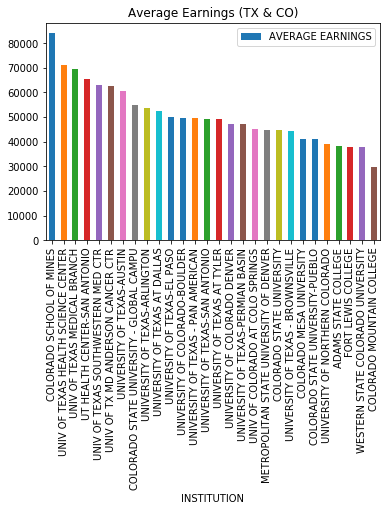

In [93]:
bsavg_earningsclean_df.plot(kind="bar", x="INSTITUTION", y="AVERAGE EARNINGS", title = "Average Earnings (TX & CO)")
plt.show()

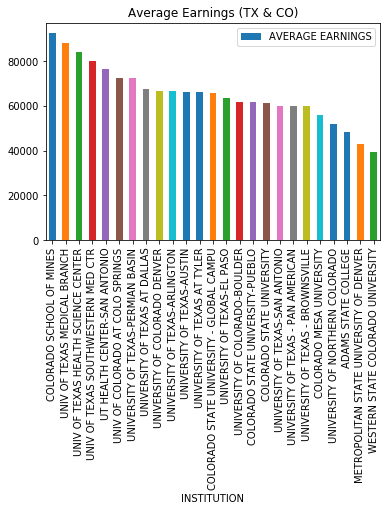

In [89]:
msavg_earningsclean_df.plot(kind="bar", x="INSTITUTION", y="AVERAGE EARNINGS", title = "Average Earnings (TX & CO)")
plt.show()

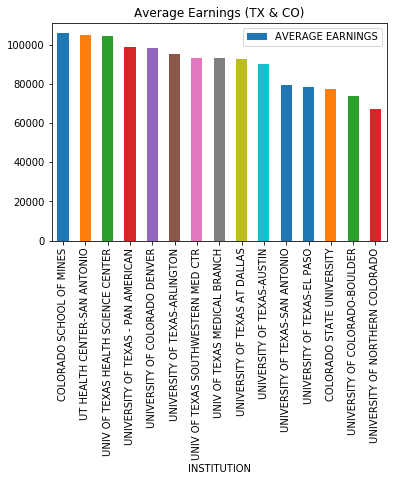

In [91]:
dravg_earnings_df.plot(kind="bar", x="INSTITUTION", y="AVERAGE EARNINGS", title = "Average Earnings (TX & CO)")
plt.show()